In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('wine.csv')

In [3]:
df.describe()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,3249.000000,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1875.666681,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,1.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1625.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,3249.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,4873.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,6497.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type,quality_ind
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White,Low
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White,Low
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White,Low
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White,Low
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White,Low


In [5]:
df.shape

(6497, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   fixed.acidity         6497 non-null   float64
 2   volatile.acidity      6497 non-null   float64
 3   citric.acid           6497 non-null   float64
 4   residual.sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free.sulfur.dioxide   6497 non-null   float64
 7   total.sulfur.dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  type                  6497 non-null   object 
 14  quality_ind           6497 non-null   object 
dtypes: float64(11), int64

In [7]:
df.isnull().any()

Unnamed: 0              False
fixed.acidity           False
volatile.acidity        False
citric.acid             False
residual.sugar          False
chlorides               False
free.sulfur.dioxide     False
total.sulfur.dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
type                    False
quality_ind             False
dtype: bool

In [8]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [9]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [10]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

<AxesSubplot:>

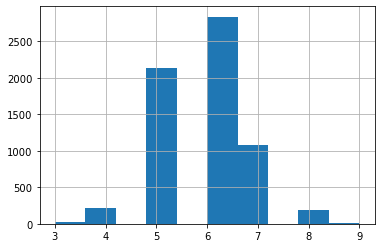

In [11]:
df['quality'].hist()

<AxesSubplot:>

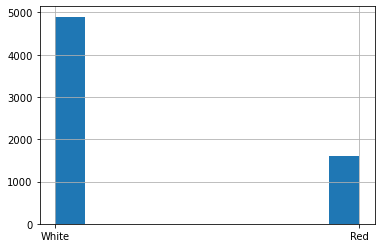

In [12]:
df['type'].hist()

In [13]:
df = df.drop(columns = ['Unnamed: 0'])

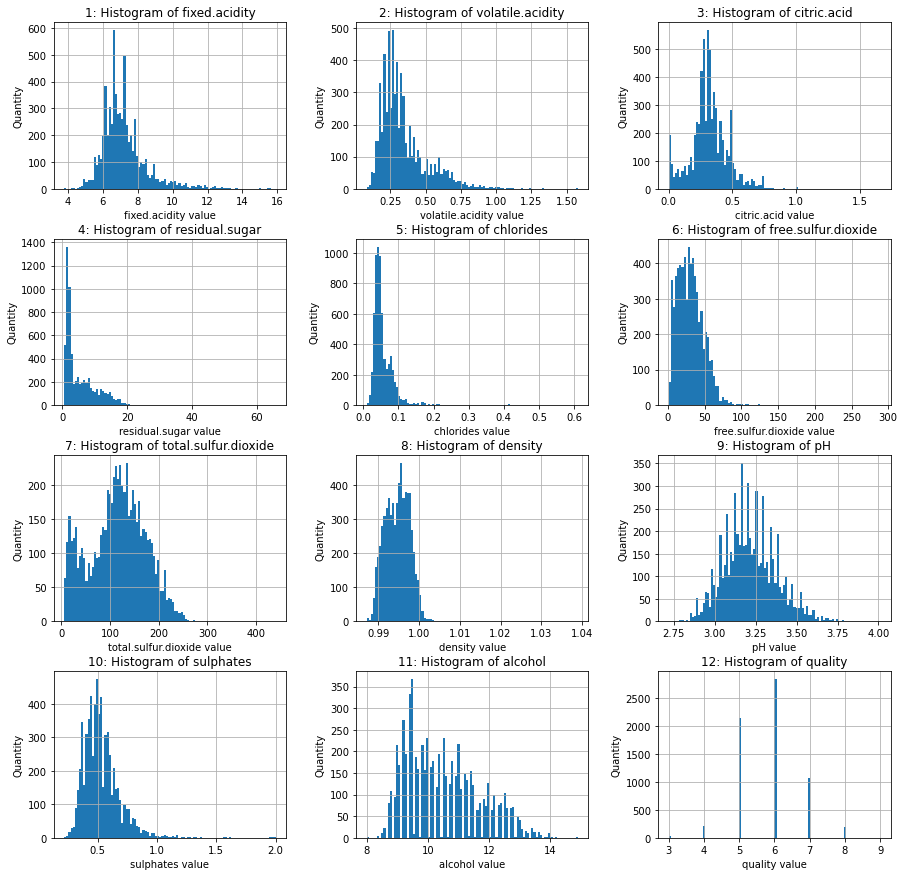

In [14]:
axarr = df.hist(bins = 100, figsize = (15,15))

i = 1

for ax in axarr.flatten():
    ax.set_xlabel(f"{ax.get_title()} value")
    ax.set_ylabel("Quantity")
    ax.set_title(f"%d: Histogram of {ax.get_title()}" % (i))
    i = i + 1

Text(87.0, 0.5, 'Parameters')

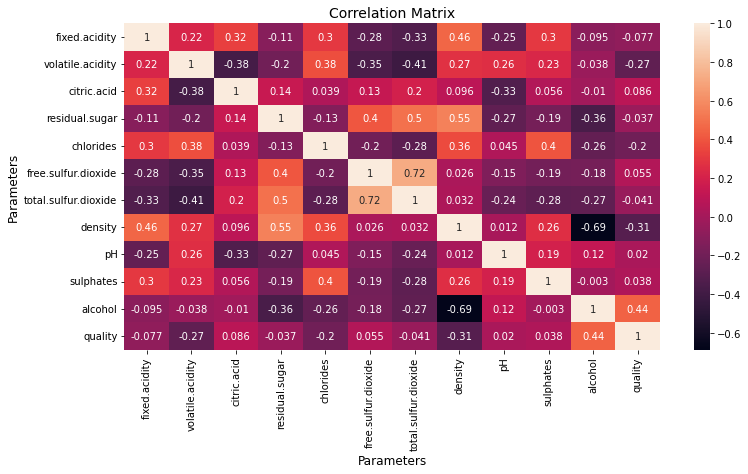

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix', fontsize = 14)
plt.xlabel('Parameters', fontsize = 12)
plt.ylabel('Parameters', fontsize = 12)

In [16]:
fig.savefig('correlation.png')

In [17]:
df = df.replace('White', 0)
df = df.replace('Red', 1)

In [18]:
df.quality_ind.value_counts()

Low     5220
High    1277
Name: quality_ind, dtype: int64

In [19]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['quality_ind'] = label_encoder.fit_transform(df['quality_ind'])

In [20]:
df.type.unique()

array([0, 1], dtype=int64)

In [21]:
#Bad: 3, 4
#Good: 5, 6, 7
#Very good: 8, 9
df['quality'] = df['quality'].replace([3,4], 0) 
df['quality'] = df['quality'].replace([5,6,7], 1)
df['quality'] = df['quality'].replace([8,9], 2)

In [22]:
X = df.drop('quality', axis=1)
y = df['quality']

In [23]:
df.quality.value_counts()

1    6053
0     246
2     198
Name: quality, dtype: int64

C:\Users\di3z\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

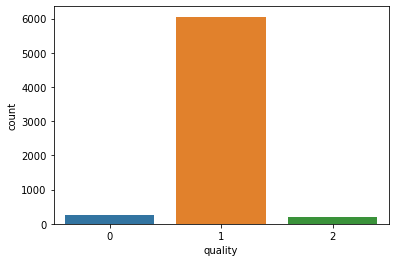

In [24]:
sns.countplot(df['quality'])

Text(86.09375, 0.5, 'Parameters')

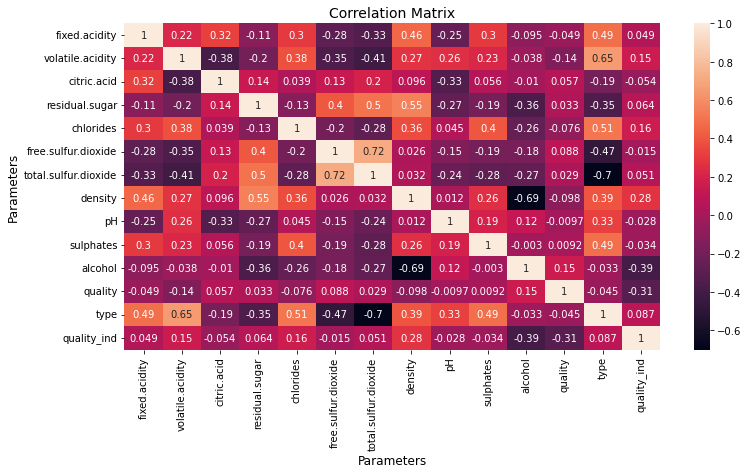

In [25]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix', fontsize = 14)
plt.xlabel('Parameters', fontsize = 12)
plt.ylabel('Parameters', fontsize = 12)

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [27]:
sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accu = accuracy_score(y_test, lr_pred)
print(lr_accu)

0.9374358974358974


In [30]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.67      0.03      0.06        69
           1       0.94      1.00      0.97      1827
           2       0.00      0.00      0.00        54

    accuracy                           0.94      1950
   macro avg       0.53      0.34      0.34      1950
weighted avg       0.90      0.94      0.91      1950



C:\Users\di3z\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\di3z\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\di3z\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
accuracy_lr = cross_val_score(lr, X_train, y_train, cv=10)
print(accuracy_lr)

[0.93186813 0.92967033 0.92747253 0.93406593 0.92967033 0.92527473
 0.92527473 0.92951542 0.93171806 0.92951542]


In [45]:
print("Accuracy of Model with Cross Validation is:",accuracy_lr.mean() * 100)

Accuracy of Model with Cross Validation is: 92.94045601975117


In [31]:
from sklearn.ensemble import RandomForestClassifier



rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accu = accuracy_score(y_test, rf_pred)
print(rf_accu)

0.9435897435897436


In [33]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.54      0.10      0.17        69
           1       0.95      0.99      0.97      1827
           2       0.80      0.30      0.43        54

    accuracy                           0.94      1950
   macro avg       0.76      0.46      0.52      1950
weighted avg       0.93      0.94      0.93      1950



In [42]:
accuracy_rf = cross_val_score(rf, X_train, y_train, cv=10)
print(accuracy_rf)

[0.93846154 0.95164835 0.94065934 0.94065934 0.93846154 0.93406593
 0.94065934 0.93832599 0.94052863 0.94933921]


In [43]:
print("Accuracy of Model with Cross Validation is:",accuracy_rf.mean() * 100)

Accuracy of Model with Cross Validation is: 94.12809217214505
